<a href="https://colab.research.google.com/github/Charan0622/Charan_Scifor/blob/main/Deep%20Learning/Assignments/Yolo%20Algorithm/YOLO_Algorithm_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import tensorflow as tf
import cv2
import numpy as np
from google.colab import files
from matplotlib import pyplot as plt

In [3]:
# Install OpenCV and numpy
!pip install opencv-python-headless numpy

# Download YOLOv3 weights
!wget -O yolov3.weights https://pjreddie.com/media/files/yolov3.weights

# Download YOLOv3 configuration file
!wget -O yolov3.cfg https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg

# Download coco.names file
!wget -O coco.names https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names


--2024-08-02 15:33:06--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  4.23MB/s    in 44s     

2024-08-02 15:33:51 (5.34 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]

--2024-08-02 15:33:51--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8.1K) [text/plain]
Saving to: ‘yolov3.cfg’

yolov3.cfg          100%[===================>]   8.15K  --.-KB/s    in 0s      

2

In [4]:
# Load YOLOv3 model
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

# Load coco names
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

# Define random colors for the classes
colors = np.random.uniform(0, 255, size=(len(classes), 3))

In [5]:
# Upload an image
uploaded = files.upload()

# Load image
image_path = list(uploaded.keys())[0]
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
height, width, channels = img.shape

Saving scifortechnologies_cover.jpeg to scifortechnologies_cover.jpeg


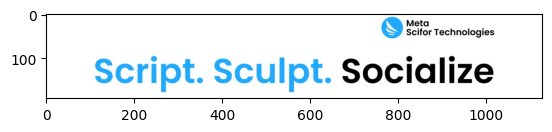

In [6]:
# Show the image
plt.imshow(img)
plt.show()

In [12]:
# Create a blob
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

# Initialize lists for detected bounding boxes, confidences, and class IDs
class_ids = []
confidences = []
boxes = []

In [13]:
# Loop through each of the layer outputs
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

In [14]:
# Perform non-maximum suppression to remove redundant overlapping boxes with lower confidences
indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

# Draw bounding boxes and labels on the image
for i in indices:
    # Ensure i is an integer index
    i = int(i)
    box = boxes[i]
    x, y, w, h = box[0], box[1], box[2], box[3]
    color = colors[class_ids[i]]
    label = str(classes[class_ids[i]])
    cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
    cv2.putText(img, label, (x, y - 10), cv2.FONT_HERSHEY_PLAIN, 1, color, 2)

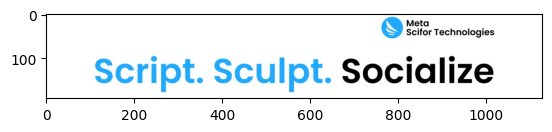

In [15]:
# Show the image with detected objects
plt.imshow(img)
plt.show()